In [1]:
import pandas as pd
from collections import Counter
from flair.models import SequenceTagger
from flair.data import Sentence

df = pd.read_csv('preprocessed_data.csv')

# Combine all text columns into a single list
texts = df['title_preprocessed'].astype(str).tolist() + df['description_preprocessed'].astype(str).tolist() + df['transcript_preprocessed'].astype(str).tolist()

# Load the Flair NER model for Spanish
tagger = SequenceTagger.load("flair/ner-spanish-large")

# Perform NER on text data and extract named entities
named_entities = []
for text in texts:
    sentence = Sentence(text)
    tagger.predict(sentence)
    named_entities.extend([(span.text, span.labels[0].value) for span in sentence.get_spans('ner')])

# Count the frequency of named entities
entity_frequencies = Counter(named_entities)

# Display the named entities and their frequencies with labels
#for (entity, label), frequency in entity_frequencies.most_common():
#    print(f"Entity: {entity}  Label: {label}  Frequency: {frequency}")


2023-08-03 23:38:41,587 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-LOC, S-ORG, B-PER, I-PER, E-PER, S-MISC, B-ORG, E-ORG, S-PER, I-ORG, B-LOC, E-LOC, B-MISC, E-MISC, I-MISC, I-LOC, <START>, <STOP>


In [4]:
# Convert the named entities and their frequencies to a DataFrame
entity_df = pd.DataFrame(entity_frequencies.most_common(), columns=['Entity_Label', 'Frequency'])

# Export the DataFrame to a CSV file
entity_df.to_csv('entity_label_frequencies.csv', index=False)


In [ ]:

# Perform NER on text data and extract named entities
person_entities = []
for text in texts:
    sentence = Sentence(text)
    tagger.predict(sentence)
    for entity in sentence.get_spans('ner'):
        if entity.labels[0].value == 'PER':
            person_entities.append(entity.text)

# Count the frequency of person entities
entity_frequencies = Counter(person_entities)

# Display the person entities and their frequencies
for entity, frequency in entity_frequencies.most_common():
    print(f"Person Entity: {entity}  Frequency: {frequency}")

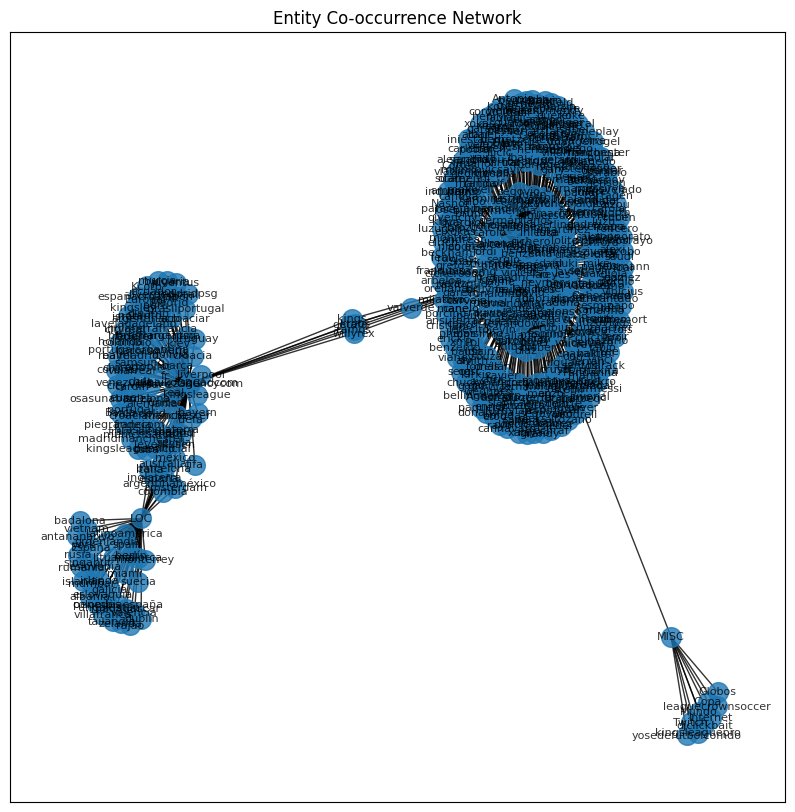

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Entity Co-occurrence Matrix
co_occurrence_matrix = {}
for entities in named_entities:
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            pair = tuple(sorted([entities[i], entities[j]]))
            co_occurrence_matrix[pair] = co_occurrence_matrix.get(pair, 0) + 1

# Step 3: Network Construction
G = nx.Graph()
for pair, count in co_occurrence_matrix.items():
    entity1, entity2 = pair
    G.add_edge(entity1, entity2, weight=count)

# Step 4: Network Analysis
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
clustering_coefficient = nx.clustering(G)

# Step 5: Visualization
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=200, font_size=8, alpha=0.8)
plt.title("Entity Co-occurrence Network")
plt.show()

# Step 6: Further Analysis
communities = nx.algorithms.community.greedy_modularity_communities(G)
# Perform additional analysis on communities, temporal dynamics, attributes, etc.
